In [ ]:
%%html
<style>
    table {margin-left: 0 !important; display: inline-block;}
</style>

# Contents

- Logging
- Debugging
- Visualizing

---

# Logging Tutorial

Please refer to the official documentation _"Logging HOWTO"_ ([ENG](https://docs.python.org/3/howto/logging.html)/[KOR](https://docs.python.org/ko/3/howto/logging.html)) for further information

Why log?  
Simple. Logs allow us to trace issues and past activities

Python provides a powerful and effective method of logging:
```python
import logging
```

Python logging library provides:
- Controlling log information
- Simultaneous stream and file logging
- Automated log file creation

In [ ]:
import logging

### Logging Instance

In [ ]:
logger = logging.getLogger(__name__)

### Logging Level

Please refer to the official documentation "_When to use logging_" ([ENG](https://docs.python.org/3/howto/logging.html#when-to-use-logging)/[KOR](https://docs.python.org/ko/3/howto/logging.html#when-to-use-logging)) for further information

Level | Number | Usage | Hierarchy
--- | :-: | --- | ---
DEBUG | 10 | Detailed information, typically of interest only when diagnosing problems | Lowest (Print all logs)
INFO | 20 | Confirmation that things are wokring as expected |
WARNING | 30 | An indication that something unexpected happened, or indicative of some problem in the near future | Default
ERROR | 40 | Due to a more serious problem, the software has not been able to perform some function |
CRITICAL | 50 | A serious error, indicating that the program itself may be unsable to continue running | Highest

_Remember: Logger will not print lower level logs_

In [ ]:
print('DEBUG', logging.getLevelName('DEBUG'))
print('INFO', logging.getLevelName('INFO'))
print('WARNING', logging.getLevelName('WARNING'))
print('ERROR', logging.getLevelName('ERROR'))
print('CRITICAL', logging.getLevelName('CRITICAL'))

In [ ]:
print('10', logging.getLevelName(10))
print('20', logging.getLevelName(20))
print('30', logging.getLevelName(30))
print('40', logging.getLevelName(40))
print('50', logging.getLevelName(50))

In [ ]:
logger.setLevel(logging.INFO)

### Logging Format

Please refer to the official documentation "_LogRecord attributes_" ([ENG](https://docs.python.org/3/library/logging.html#logrecord-attributes)/[KOR](https://docs.python.org/ko/3/library/logging.html#logrecord-attributes)) for further information

Format | Description
--- | ---
%(asctime)s | ASCII time at the moment LogRecord is created. Default form is <%Y-%m-%d %H:%M:%S,uuu>)
%(filename)s | Name of the file containing the logging call
%(levelname)s | Logging level
%(lineno)d | Source line number where the logging call was issued
%(message)s | Logged message
%(name)s | Name of the logger

In [ ]:
formatter = logging.Formatter(
    fmt='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    datefmt='%m-%d %H:%M:%S'
)

### Logging Handler

In [ ]:
streamhandler = logging.StreamHandler()

streamformatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
streamhandler.setFormatter(streamformatter)

logger.addHandler(streamhandler)

In [ ]:
from datetime import datetime

fname = './Week8_{:%Y-%m-%d-%H%M}.log'.format(datetime.now())
filehandler = logging.FileHandler(fname)

fileformatter = logging.Formatter('[%(asctime)s] (%(filename)s: %(lineno)d) %(levelname)s - %(message)s')
filehandler.setFormatter(fileformatter)

logger.addHandler(filehandler)

### Custom Logging Level

In [ ]:
num = 15
print(logging.getLevelName(num))

In [ ]:
newlevel = 'DEBUG > L > INFO'
logging.addLevelName(num, newlevel)

print(logging.getLevelName(newlevel), logging.getLevelName(num))

### Logging Practice

In [ ]:
logger.debug('Hello, World!')

In [ ]:
logger.info('Suppose things are working as expected?')

In [ ]:
logger.warning('You should do something about this.')

In [ ]:
logger.error('I told you so!')

In [ ]:
logger.critical('You never listen!')

In [ ]:
logger.debug('Bye, World!')

### Summary

In [ ]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

streamhandler = logging.StreamHandler()
streamformatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
streamhandler.setFormatter(streamformatter)
logger.addHandler(streamhandler)

fname = './Week8_{:%Y-%m-%d-%H%M}.log'.format(datetime.now())
filehandler = logging.FileHandler(fname)
fileformatter = logging.Formatter('[%(asctime)s] (%(filename)s: %(lineno)d) %(levelname)s - %(message)s')
filehandler.setFormatter(formatter)
logger.addHandler(filehandler)

---

# Debugging Tutorial

How does a debugger work?  
Simply, it executes your code a line at a time(_single stepping_) from a breakpoint. It will create a debugging event once it finds a debug trap  
But, we do not need to know everything about how a debugger works e.g. how it attachs to a process memory, how it loops, how it deals with exception, etc.

Should we always use a debugger?  
Well, why not?

## Debugger Command

Please refer to the official documentation "_Debugger Commands_" ([ENG](https://docs.python.org/3/library/pdb.html#debugger-commands)/[KOR](https://docs.python.org/ko/3/library/pdb.html#debugger-commands)) for further information

Command | Description
--- | ---
h(elp) | Print list of available commands
w(here) | Print a stack trace
n(ext) | Execute current line
s(tep) | Execute current line and step in subroutine
c(ontinue) | Continue execution until the next breakpoint
b(reak) | Add a breakpoint at a certain line number
l(ist) | Print source position
p(rint) | Print variable
q(uit) | End debugger

In [ ]:
import pdb; pdb.set_trace()

## Debugging in Jupyter with PDB
_Remember: PDB only behaves properly within a subroutine_

In [ ]:
def foo(bar):
    k = 2
    import pdb; pdb.set_trace()
    k = k + 1
    g = 2
    bar = g + k
    return bar

## Debugging in Jupyter (Magic Command)
It works just like PDB except ...

In [ ]:
%%debug
b = 'efg'
def foo(bar):
    k = 2
    k = k + 1
    g = 2
    bar = g + k
    return bar
foo('test debug')

In [ ]:
def foo():
    print('Hello?')

In [ ]:
%debug foo()

This is just bad

## Practical Way to Debug in Jupyter

Remember that Jupyter runs by cell unit  
So, instead of using debuggers, slice your code into different cells, print them, then debug them

\- or -

You can use extensions:  
[JupyterNotebook - PixieDust](https://pixiedust.github.io/pixiedust/index.html) or [JupyterLab - Debugger](https://jupyterlab.readthedocs.io/en/latest/user/debugger.html)

---

# Visualization

Please refer to the official documentation [Seaborn](https://seaborn.pydata.org/) for further information

MatplotLib &rarr; Seaborn &rarr; Plotly

You would need to install by these commands: (for Anaconda users)

```
conda install seaborn
```

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')

In [3]:
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

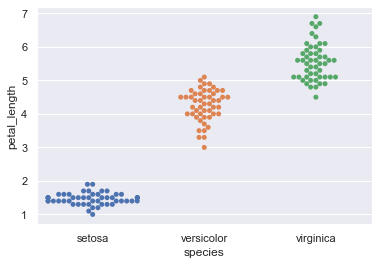

In [6]:
sns.swarmplot(x='species', y ='petal_length', data=iris)

In [7]:
plt.rcParams['figure.figsize'] = (16, 8)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

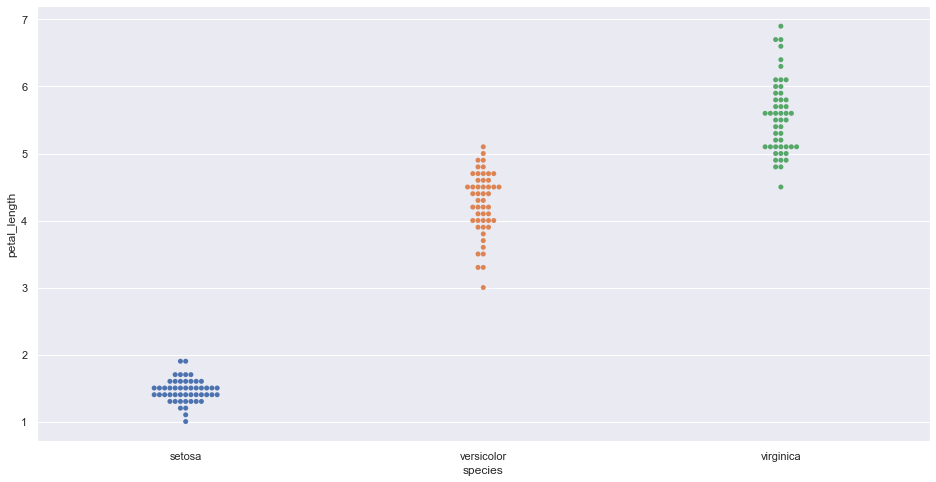

In [8]:
sns.swarmplot(x='species', y ='petal_length', data=iris)

In [9]:
tips = sns.load_dataset('tips')

In [10]:
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

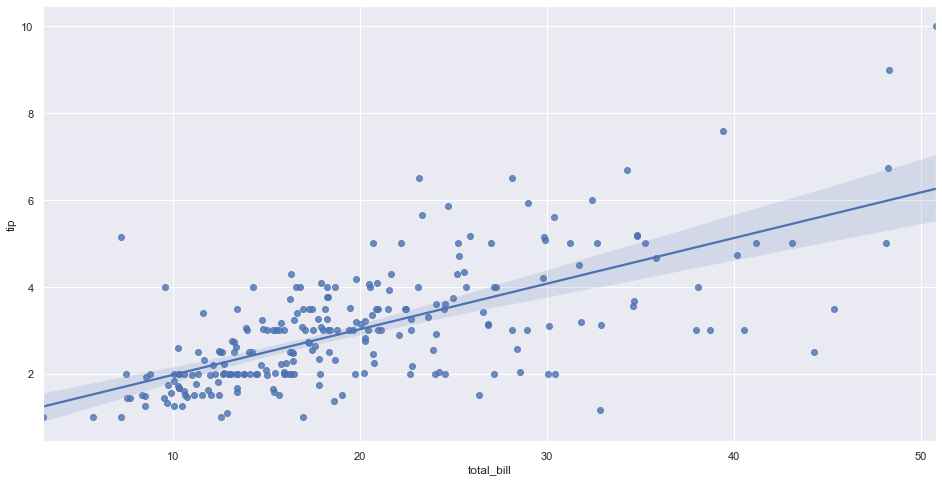

In [12]:
sns.regplot(x='total_bill', y='tip', data=tips)

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette="Set1")

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips)